



# <center> Can we predict when an issue will be resolved?
    
    
    
 ## <center> Xccelerated Assignment  on the JIRA AVRO issues workflow 

### <center> by Joao Gomes, Amsterdam 2018

## Outline

* Introduction
* Data preliminary analysis
* Feature engineering
* Training Algorithms:

    * Random Forests
    * K-Nearest Neighbors
    * Lasso Regression
    * Gradient Boosting Regression

* Discussion
* Conclusions

* Description of the scripts:
    
    1. Fake_GET
    2. Training 
    3. Prediciton_GET
    4. Release_Plan
    



# Introduction

### The AVRO issue JIRA workflow

![alt text]( AVRO-issue.png "Title")

We load the various data files and make a preliminary exploratory analysis.

# Data Preliminary Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
#Loading Data

data_issues=pd.read_json('/Users/JoaoGomes/Dropbox/Xcelerated/assessment/data/avro-issues.json',lines=True)

In [341]:
# Name of columns

data_issues.columns

Index(['_id', 'changelog', 'editmeta', 'expand', 'fields', 'id', 'key',
       'names', 'operations', 'renderedFields', 'schema', 'self',
       'transitions'],
      dtype='object')

In [3]:
data_issues.head()

,_id,changelog,editmeta,expand,fields,id,key,names,operations,renderedFields,schema,self,transitions
0,AVRO-2171,"{'total': 5, 'startAt': 0, 'histories': [{'ite...",{'fields': {}},"renderedFields,names,schema,transitions,operat...","{'labels': ['website'], 'customfield_12310420'...",13153159,AVRO-2171,"{'labels': 'Labels', 'customfield_12310420': '...","{'linkGroups': [{'links': [], 'id': 'view.issu...","{'labels': None, 'customfield_12310420': None,...","{'labels': {'items': 'string', 'type': 'array'...",https://issues.apache.org/jira/rest/api/2/issu...,[]
1,AVRO-2170,"{'total': 5, 'startAt': 0, 'histories': [{'ite...",{'fields': {}},"renderedFields,names,schema,transitions,operat...","{'labels': ['website'], 'customfield_12310420'...",13153155,AVRO-2170,"{'labels': 'Labels', 'customfield_12310420': '...","{'linkGroups': [{'links': [], 'id': 'view.issu...","{'labels': None, 'customfield_12310420': None,...","{'labels': {'items': 'string', 'type': 'array'...",https://issues.apache.org/jira/rest/api/2/issu...,[]
2,AVRO-2169,"{'total': 1, 'startAt': 0, 'histories': [{'ite...",{'fields': {}},"renderedFields,names,schema,transitions,operat...","{'labels': [], 'customfield_12310420': '922337...",13150595,AVRO-2169,"{'labels': 'Labels', 'customfield_12310420': '...","{'linkGroups': [{'links': [], 'id': 'view.issu...","{'labels': None, 'customfield_12310420': None,...","{'labels': {'items': 'string', 'type': 'array'...",https://issues.apache.org/jira/rest/api/2/issu...,[]
3,AVRO-2168,"{'total': 2, 'startAt': 0, 'histories': [{'ite...",{'fields': {}},"renderedFields,names,schema,transitions,operat...","{'labels': [], 'customfield_12310420': '922337...",13150292,AVRO-2168,"{'labels': 'Labels', 'customfield_12310420': '...","{'linkGroups': [{'links': [], 'id': 'view.issu...","{'labels': None, 'customfield_12310420': None,...","{'labels': {'items': 'string', 'type': 'array'...",https://issues.apache.org/jira/rest/api/2/issu...,[]
4,AVRO-2167,"{'total': 1, 'startAt': 0, 'histories': [{'ite...",{'fields': {}},"renderedFields,names,schema,transitions,operat...","{'labels': [], 'customfield_12310420': '922337...",13150071,AVRO-2167,"{'labels': 'Labels', 'customfield_12310420': '...","{'linkGroups': [{'links': [], 'id': 'view.issu...","{'labels': None, 'customfield_12310420': None,...","{'labels': {'items': 'string', 'type': 'array'...",https://issues.apache.org/jira/rest/api/2/issu...,[]


In [339]:
data_issues['changelog'][0]

{'histories': [{'author': {'active': True,
    'avatarUrls': {'16x16': 'https://issues.apache.org/jira/secure/useravatar?size=xsmall&avatarId=10452',
     '24x24': 'https://issues.apache.org/jira/secure/useravatar?size=small&avatarId=10452',
     '32x32': 'https://issues.apache.org/jira/secure/useravatar?size=medium&avatarId=10452',
     '48x48': 'https://issues.apache.org/jira/secure/useravatar?avatarId=10452'},
    'displayName': 'Roy Lenferink',
    'emailAddress': 'lenferinkroy at gmail dot com',
    'key': 'rlenferink',
    'name': 'rlenferink',
    'self': 'https://issues.apache.org/jira/rest/api/2/user?username=rlenferink',
    'timeZone': 'Europe/Amsterdam'},
   'created': '2018-04-17T21:55:48.755+0000',
   'id': '16768043',
   'items': [{'field': 'Attachment',
     'fieldtype': 'jira',
     'from': None,
     'fromString': None,
     'to': '12919489',
     'toString': 'AVRO-2171.patch'}]},
  {'author': {'active': True,
    'avatarUrls': {'16x16': 'https://issues.apache.org/jir

In [345]:
# Number of histories

data_issues['changelog'][0]['total']

5

In [344]:
# Look at histories

data_issues['changelog'][0]['histories'][4]

{'author': {'active': True,
  'avatarUrls': {'16x16': 'https://issues.apache.org/jira/secure/useravatar?size=xsmall&ownerId=busbey&avatarId=13233',
   '24x24': 'https://issues.apache.org/jira/secure/useravatar?size=small&ownerId=busbey&avatarId=13233',
   '32x32': 'https://issues.apache.org/jira/secure/useravatar?size=medium&ownerId=busbey&avatarId=13233',
   '48x48': 'https://issues.apache.org/jira/secure/useravatar?ownerId=busbey&avatarId=13233'},
  'displayName': 'Sean Busbey',
  'emailAddress': 'busbey at cloudera dot com',
  'key': 'busbey',
  'name': 'busbey',
  'self': 'https://issues.apache.org/jira/rest/api/2/user?username=busbey',
  'timeZone': 'America/Chicago'},
 'created': '2018-04-21T15:44:36.753+0000',
 'id': '16778743',
 'items': [{'field': 'status',
   'fieldtype': 'jira',
   'from': '10002',
   'fromString': 'Patch Available',
   'to': '3',
   'toString': 'In Progress'}]}

## An issue can go through various status changes:

### Open -> In Progress -> Patch Available -> Resolved -> Reopened -> Resolved -> Closed
(Not necessarily in this order)

In [4]:
data_issues_csv=pd.read_csv('/Users/JoaoGomes/Dropbox/Xcelerated/assessment/data/avro-issues.csv')

In [5]:
# Loading avro-issues.csv

data_issues_csv.head()

,status,priority,updated,issue_type,reporter,created,resolutiondate,vote_count,project,assignee,comment_count,key,description_length,summary_length,watch_count,resolution,days_in_current_status
0,In Progress,Major,2018-04-21T15:44:36.749+0000,Improvement,rlenferink,2018-04-17T21:53:05.730+0000,NaN,0,AVRO,rlenferink,1,AVRO-2171,233.0,43,1,NaN,4.643599
1,In Progress,Minor,2018-04-21T15:42:40.935+0000,Improvement,rlenferink,2018-04-17T21:47:11.197+0000,NaN,0,AVRO,rlenferink,1,AVRO-2170,528.0,68,2,NaN,4.644939
2,Resolved,Major,2018-04-24T06:34:58.782+0000,Improvement,jmukesh,2018-04-06T13:45:28.721+0000,2018-04-24T06:34:58.762+0000,0,AVRO,NaN,0,AVRO-2169,1062.0,75,1,Not A Bug,2.025288
3,Resolved,Major,2018-04-24T06:34:37.360+0000,Bug,jmukesh,2018-04-05T13:21:01.183+0000,2018-04-24T06:34:37.339+0000,0,AVRO,NaN,1,AVRO-2168,272.0,64,1,Not A Bug,2.025536
4,Resolved,Major,2018-04-24T06:34:15.849+0000,Bug,jmukesh,2018-04-04T16:39:43.364+0000,2018-04-24T06:34:15.829+0000,0,AVRO,NaN,0,AVRO-2167,674.0,53,1,Not A Bug,2.025785


In [6]:
# Number of issues: we have in total

len(data_issues)

2166

In [7]:
len(data_issues_csv)

2166

In [8]:
# We also load avro-transitions.csv

data_issues_transitions=pd.read_csv('/Users/JoaoGomes/Dropbox/Xcelerated/assessment/data/avro-transitions.csv')

In [9]:
len(data_issues_transitions)

6260

In [10]:
data_issues_transitions.head()

,status,updated,from_status,reporter,when,days_in_from_status,who,to_status,assignee,key,...,project,created,transition,resolutiondate,comment_count,priority,vote_count,issue_type,watch_count,resolution
0,In Progress,2018-04-21T15:44:36.749+0000,NaN,rlenferink,2018-04-17T21:53:05.730+0000,NaN,rlenferink,Open,rlenferink,AVRO-2171,...,AVRO,2018-04-17T21:53:05.730+0000,Non-existent to Open,NaN,1,Major,0,Improvement,1,NaN
1,In Progress,2018-04-21T15:44:36.749+0000,Open,rlenferink,2018-04-18T01:33:49.088+0000,0.153280,busbey,Patch Available,rlenferink,AVRO-2171,...,AVRO,2018-04-17T21:53:05.730+0000,Open to Patch Available,NaN,1,Major,0,Improvement,1,NaN
2,In Progress,2018-04-21T15:44:36.749+0000,Patch Available,rlenferink,2018-04-21T15:44:36.753+0000,3.590829,busbey,In Progress,rlenferink,AVRO-2171,...,AVRO,2018-04-17T21:53:05.730+0000,Patch Available to In Progress,NaN,1,Major,0,Improvement,1,NaN
3,In Progress,2018-04-21T15:42:40.935+0000,NaN,rlenferink,2018-04-17T21:47:11.197+0000,NaN,rlenferink,Open,rlenferink,AVRO-2170,...,AVRO,2018-04-17T21:47:11.197+0000,Non-existent to Open,NaN,1,Minor,0,Improvement,2,NaN
4,In Progress,2018-04-21T15:42:40.935+0000,Open,rlenferink,2018-04-18T01:33:19.205+0000,0.157037,busbey,Patch Available,rlenferink,AVRO-2170,...,AVRO,2018-04-17T21:47:11.197+0000,Open to Patch Available,NaN,1,Minor,0,Improvement,2,NaN


The 'changelog' field of 'data_issues (json)' contains important information about updates, authors and 
change of status. In other words, it contains the history of a particular issue. Here is an example:


In [11]:
data_issues['changelog'][0]

{'histories': [{'author': {'active': True,
    'avatarUrls': {'16x16': 'https://issues.apache.org/jira/secure/useravatar?size=xsmall&avatarId=10452',
     '24x24': 'https://issues.apache.org/jira/secure/useravatar?size=small&avatarId=10452',
     '32x32': 'https://issues.apache.org/jira/secure/useravatar?size=medium&avatarId=10452',
     '48x48': 'https://issues.apache.org/jira/secure/useravatar?avatarId=10452'},
    'displayName': 'Roy Lenferink',
    'emailAddress': 'lenferinkroy at gmail dot com',
    'key': 'rlenferink',
    'name': 'rlenferink',
    'self': 'https://issues.apache.org/jira/rest/api/2/user?username=rlenferink',
    'timeZone': 'Europe/Amsterdam'},
   'created': '2018-04-17T21:55:48.755+0000',
   'id': '16768043',
   'items': [{'field': 'Attachment',
     'fieldtype': 'jira',
     'from': None,
     'fromString': None,
     'to': '12919489',
     'toString': 'AVRO-2171.patch'}]},
  {'author': {'active': True,
    'avatarUrls': {'16x16': 'https://issues.apache.org/jir

In [12]:
data_issues['changelog'][0]['total']

5

There is a total of 5 updates or "interventions" but the issue is not resolved as the last reported status 
is "In progress".

# Feature Engineering 

# Hypothesis: similar histories ~ similar outcomes

Suppose we have an issue, call it A, not in the DATA and we want to predict when it will be resolved. The intuitive idea is to find the issues in the DATA that are most similar to A and then extrapolate (like an average) the future outcome of A. 

So we need to understand what it means to be similar and which features are determining that. I will not create a model that determines how two issues are similar but I will let the machine learning algorithm find that by itself. For this purpose I will use a RandomForestRegression algorithm and let it determine by itself the most relevant features. I will also compare with other algorithms.


* STEP 1: collect features for the DATA such as:


    - lifetime (from creation to last status!=Resolved) 
    - Priority: Major/Minor/Trivial...,
    - issue_type: Bug, Task...,
    - number_votes,
    - number_counts,
    - number of comments
    - how many different authors,
    - most frequent author
    - number_interventions (that is, size of histories list),
    - history of status change. Ex: 'In progress', 'Patch Available', In Progress'
    - Time evolution. Ex: '2018-01-01:TIME', '2018-02-02:TIME', '2018-03-03:TIME',... ?
    
 * STEP 2: Apply Algorithm 
 
 
     - RandomForest
     - k-NN
     - Lasso
     - Gradient Boosting Regression

# Lets determine Lifetime of the issues 

### Lifetime = date_last_status (not Resolved) - date_created

In [13]:
from dateutil.parser import parse
from datetime import timedelta

# NOTE:

### There can be issues with multiple 'Resolved' status:
#### Open-> In Progress -> Resolved -> Reopened -> Resolved -> Reopened ->...

#### Extract multiple events:

* Open-> In Progress -> Resolved
* Open-> In Progress -> Resolved -> Reopened -> Resolved
* Open-> In Progress -> Resolved -> Reopened -> Resolved -> Reopened ->...

In [14]:
t_open_resol=[]
l_trans=len(data_issues_transitions)

# go through rows and determine when an issue has status= Resolved
# Then go backwards and find when it was created
# This way we can keep track of issues which have multiple Resolved statuses

for i in range(0,l_trans):
    if data_issues_transitions['to_status'][i]=='Resolved':
        j=i
        while data_issues_transitions['to_status'][j]!='Open':
            j-=1
        t_open_resol.append({'index':[j,i],'key': data_issues_transitions['key'][i],
                             'type': data_issues_transitions['issue_type'][i]
                      ,'whenOpen': data_issues_transitions['created'][j],
                             'whenResol':data_issues_transitions['when'][i],# Note that sometimes the issue is Reopened and the Resolution date=NaN
                            'last_stat_notResol':data_issues_transitions['when'][i-1]})

In [15]:
# An example

t_open_resol[45]

{'index': [212, 218],
 'key': 'AVRO-2049',
 'last_stat_notResol': '2017-07-26T15:38:29.254+0000',
 'type': 'Improvement',
 'whenOpen': '2017-07-17T01:05:58.080+0000',
 'whenResol': '2017-07-28T07:18:43.306+0000'}

In [16]:
# Issue with multiple changes in its status

data_issues_transitions[212:219]

,status,updated,from_status,reporter,when,days_in_from_status,who,to_status,assignee,key,...,project,created,transition,resolutiondate,comment_count,priority,vote_count,issue_type,watch_count,resolution
212,Resolved,2017-07-28T07:18:43.296+0000,NaN,belugabehr,2017-07-17T01:05:58.080+0000,NaN,belugabehr,Open,belugabehr,AVRO-2049,...,AVRO,2017-07-17T01:05:58.080+0000,Non-existent to Open,2017-07-28T07:18:43.249+0000,9,Trivial,0,Improvement,4,Fixed
213,Resolved,2017-07-28T07:18:43.296+0000,Open,belugabehr,2017-07-17T01:06:30.463+0000,0.000375,belugabehr,Patch Available,belugabehr,AVRO-2049,...,AVRO,2017-07-17T01:05:58.080+0000,Open to Patch Available,2017-07-28T07:18:43.249+0000,9,Trivial,0,Improvement,4,Fixed
214,Resolved,2017-07-28T07:18:43.296+0000,Patch Available,belugabehr,2017-07-26T15:24:37.196+0000,9.595911,belugabehr,In Progress,belugabehr,AVRO-2049,...,AVRO,2017-07-17T01:05:58.080+0000,Patch Available to In Progress,2017-07-28T07:18:43.249+0000,9,Trivial,0,Improvement,4,Fixed
215,Resolved,2017-07-28T07:18:43.296+0000,In Progress,belugabehr,2017-07-26T15:37:13.582+0000,0.008754,belugabehr,Patch Available,belugabehr,AVRO-2049,...,AVRO,2017-07-17T01:05:58.080+0000,In Progress to Patch Available,2017-07-28T07:18:43.249+0000,9,Trivial,0,Improvement,4,Fixed
216,Resolved,2017-07-28T07:18:43.296+0000,Patch Available,belugabehr,2017-07-26T15:37:54.045+0000,0.000468,belugabehr,In Progress,belugabehr,AVRO-2049,...,AVRO,2017-07-17T01:05:58.080+0000,Patch Available to In Progress,2017-07-28T07:18:43.249+0000,9,Trivial,0,Improvement,4,Fixed
217,Resolved,2017-07-28T07:18:43.296+0000,In Progress,belugabehr,2017-07-26T15:38:29.254+0000,0.000408,belugabehr,Patch Available,belugabehr,AVRO-2049,...,AVRO,2017-07-17T01:05:58.080+0000,In Progress to Patch Available,2017-07-28T07:18:43.249+0000,9,Trivial,0,Improvement,4,Fixed
218,Resolved,2017-07-28T07:18:43.296+0000,Patch Available,belugabehr,2017-07-28T07:18:43.306+0000,1.652940,gszadovszky,Resolved,belugabehr,AVRO-2049,...,AVRO,2017-07-17T01:05:58.080+0000,Patch Available to Resolved,2017-07-28T07:18:43.249+0000,9,Trivial,0,Improvement,4,Fixed


NOTE: Status :{'Patch Available', 'In Progress', 'Resolved', 'Reopened' and 'Closed'}
        Examples:
            - Open->In Progress->...Resolved->Closed (only 1x Resolved)
            - Open->...->Resolved->Reopened->...->Resolved->Reopened->...->Resolved->Closed (multiple Resolved)
      
      I will extract multiple histories from the issue with multiple Resolved:
      - Open->...->Resolved(1)
      - Open->...->Resolved(1)->...->Resolved(2)
      - ...etc

## Dates come in ISOformat. So, to determine the Lifetime we need to convert the dates to numbers and compute the difference 'when_last_status_not_Resol' - 'whenOpen'

In [17]:
for t in t_open_resol:
    t1=parse(t['whenOpen'])
    t2=parse(t['last_stat_notResol'])
    delta=t2-t1
    t['lifetime']=delta

In [18]:
t_open_resol[45]

{'index': [212, 218],
 'key': 'AVRO-2049',
 'last_stat_notResol': '2017-07-26T15:38:29.254+0000',
 'lifetime': datetime.timedelta(9, 52351, 174000),
 'type': 'Improvement',
 'whenOpen': '2017-07-17T01:05:58.080+0000',
 'whenResol': '2017-07-28T07:18:43.306+0000'}

In [19]:
# Write function that gives total number of days (float)

def Delta_days(x):
    seconds=x.seconds+x.microseconds/1000
    total=x.days+seconds/(24*3600)
    return total

In [20]:
for t in t_open_resol:
    t['lifetime']=Delta_days(t['lifetime'])

In [350]:
t_open_resol[200]

{'index': [795, 798],
 'key': 'AVRO-1781',
 'last_stat_notResol': '2016-01-20T03:13:39.042+0000',
 'lifetime': 8.440914351851852,
 'type': 'Bug',
 'whenOpen': '2016-01-11T16:49:44.381+0000',
 'whenResol': '2016-01-20T04:20:02.214+0000'}

# Type of issues in the DATA

In [22]:
issue_types=[]
for i in t_open_resol:
    j1=i['index'][0]
    j2=i['index'][1]
    a=data_issues_transitions['issue_type'][j1]
    b=data_issues_transitions['issue_type'][j2]
    if a==b:
        issue_types.append(data_issues_transitions['issue_type'][j2])
    else:
        print("something not right!")
issue_types_set=set(issue_types)


In [23]:
issue_types_set

{'Bug', 'Improvement', 'New Feature', 'Sub-task', 'Task', 'Test', 'Wish'}

In [24]:
issue_types[:10]

['Improvement',
 'Bug',
 'Bug',
 'Bug',
 'Bug',
 'Bug',
 'Improvement',
 'Bug',
 'Improvement',
 'Improvement']

### Associate unique integer {0,1,2,3,4,5, 6} to every issue. I assign those integers randomly to decrease bias.


In [25]:
import random

c=[i for i in range(0,7)]
c=random.sample(c,7)
L=['Bug', 'Improvement', 'New Feature', 'Sub-task', 'Task', 'Test', 'Wish']
issue_dic={}
j=0
for i in L:
    issue_dic[i]=c[j]
    j+=1
print(issue_dic)

{'Bug': 1, 'Improvement': 4, 'New Feature': 3, 'Sub-task': 6, 'Task': 0, 'Test': 2, 'Wish': 5}


In [26]:
issue_types_num=[]
for i in issue_types:
    issue_types_num.append(issue_dic[i])


In [27]:
issue_types_num[:6]

[4, 1, 1, 1, 1, 1]

# Priority 

In [28]:
priority=[]
for t in t_open_resol:
    i=t['index'][1]
    priority.append(data_issues_transitions['priority'][i])


In [29]:
set(priority)

{'Blocker', 'Critical', 'Major', 'Minor', 'Trivial'}

In this case I will associate higher values to more difficult issues on the hypothesis that higher difficulty leads to longer time for resolution (according to JIRA documentation website).

- Trivial:0
- Minor:1
- Major:2
- Critical:3
- Blocker:4

In [30]:
p_dic={'Trivial':0,'Minor':1,'Major':2,'Critical':3,'Blocker':4}

priority_num=[]
for i in priority:
    priority_num.append(p_dic[i])


In [31]:
priority_num[:10]

[2, 2, 2, 2, 0, 0, 2, 1, 2, 1]

# Votes

In [32]:
votes=[]
for t in t_open_resol:
    i=t['index'][1]
    votes.append(data_issues_transitions['vote_count'][i])

In [33]:
set(votes)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

# Watch_Counts

In [34]:
w_counts=[]
for t in t_open_resol:
    i=t['index'][1]
    w_counts.append(data_issues_transitions['watch_count'][i])

In [35]:
set(w_counts)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 17, 18, 29, 33}

# Comments_Counts

In [36]:
c_counts=[]
for t in t_open_resol:
    i=t['index'][1]
    c_counts.append(data_issues_transitions['comment_count'][i])

In [37]:
C=list(set(c_counts))
len(C)


51

In [38]:
C[0:51:3]

[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 37, 41, 49, 58, 65]

# Who_counts

### Trying to include information about the authors

In [39]:
who_counts=[]
for t in t_open_resol:
    j=t['index'][0]
    i=t['index'][1]
    aux=[]
    for k in range(j,i): #NOTE: get the data up to the status just before 'Resolved'
        aux.append(data_issues_transitions['who'][k])
    who_counts.append(aux)


In [40]:
who_counts[:10]

[['jmukesh'],
 ['jmukesh'],
 ['jmukesh'],
 ['jmukesh'],
 ['maxenglander', 'cutting'],
 ['phaas'],
 ['Tobi', 'Tobi'],
 ['vishelma', 'nkollar'],
 ['elmendavies', 'cutting'],
 ['gszadovszky', 'gszadovszky']]

### Diversity and Resilience 


- more diversity if the Set={authors} is also bigger. That is, if there is more diversity on who makes the status changes

- more resillience means that there are less authors making the most of the job. Practically, compute average from {author1 x n1, author2 x n2,...}, that is, compute average(n1,n2,...). Example, if there is a single author making N changes then I define resilience as N.

In [41]:
# Diversity

diversity=[]
for a in who_counts:
    s=set(a)
    number=len(s)
    diversity.append(number)


In [42]:
diversity[0:10]

[1, 1, 1, 1, 2, 1, 1, 2, 2, 1]

In [43]:
# Resilience

resilience=[]
for a in who_counts:
    s=set(a)
    aux=[]
    for b in s:
        c=a.count(b)
        aux.append(c)
    c=np.array(aux)
    m=c.mean()
    resilience.append(m)
    

In [44]:
resilience[:10]

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0]

# Number of interventions (not necessarily giving rise to a change of status)



By intervention, I mean the number of contributions to the history of a particular issue.
{histories: {author:... , items:...},
              {author: ..., items: ...},
              ...
              
This corresponds roughly to the variable 'total' in DATA['changelog'][i]['total']. However, we need to be careful because there can be issues with 'Reopened' statuses which require a more detailed counting.

Also we have to count this number only up to/before the status becomes 'Resolved'.

This information is in data_issues. First we create a set {'key'} of the issues that were resolved.

In [45]:
keys=[]
for t in t_open_resol:
    keys.append(t['key'])


In [46]:
keys[:5]

['AVRO-2169', 'AVRO-2168', 'AVRO-2167', 'AVRO-2166', 'AVRO-2157']

In [47]:
interventions=[]
key0='init'
for key in keys:
    if key!=key0:
        i=data_issues.index[data_issues['key']==key] 
        i=i[0] #this is the index
        a=data_issues['changelog'][i]['histories'] #it is a list
        l=len(a)
        aux=[]
        for k in range(0,l):
            for s in a[k]['items']: #items field can have many 'fields'
                if s['field']=='status': #corresponds to a change of status
                    aux.append([k,s['toString']])
        for u in aux:
            if u[1]=='Resolved':
                interventions.append(u[0])
    key0=key


In [48]:
interventions[:10]

[0, 1, 0, 0, 2, 4, 8, 3, 4, 3]

In [49]:
len(interventions)

1557

In [50]:
len(t_open_resol)

1557

dimensions agree!

# History of Status Change:

- O: Open
- I: In progress
- P: Patch
- R: Resolved
- Re: Reopened

Ex: I P I P I R Re R Re 

How do we encode such a sequence in the training data? Because it has variable dimension we can't just add additional columns. Its best to encode the sequence in a number. Make the identification:

- O==0
- I==1
- P==2
- R==3
- Re==4


We can use a base-5 numeral system. That is,

X={0,1,2,3,4}5^0+{0,1,2,3,4}5^1+{0,1,2,3,4}5^2+{0,1,2,3,4}5^3+...
it is equivalent to the sequence

X=={O,I,P,R,Re},{O,I,P,R,Re},{O,I,P,R,Re},{O,I,P,R,Re},...

Example:
Sequence: OIPIP -> 0x5^0+1x5^1+2x5^2+1x5^3+2x5^4=5+50+5^3+2x5^4=1430

The map is one-to-one. Since it grows "geometrically", the emphasis is put on the last status since this is the term that contributes the most to the number.

In [51]:
histories=[]
l_trans=len(data_issues_transitions)

for i in range(0,l_trans):
    if data_issues_transitions['to_status'][i]=='Resolved':
        j=i
        aux=[]
        while data_issues_transitions['to_status'][j]!='Open':
            j-=1
            aux.append(data_issues_transitions['to_status'][j])
        histories.append(aux)

In [52]:
histories[:10]

[['Open'],
 ['Open'],
 ['Open'],
 ['Open'],
 ['Patch Available', 'Open'],
 ['Open'],
 ['Patch Available', 'Open'],
 ['Patch Available', 'Open'],
 ['Patch Available', 'Open'],
 ['Patch Available', 'Open']]

### Convert to base-5:

Status {'Open','Patch Available', 'In Progress', 'Resolved', 'Reopened' and 'Closed'}

In [53]:
base5={'Open':0,'In Progress':1,'Patch Available':2,'Resolved':3,'Reopened':4}

In [54]:
base5['Open']

0

In [55]:
h_base5=[]
for h in histories:
    aux=[]
    for a in h:
        aux.append(base5[a])
    h_base5.append(aux)

#now convert to base-5 numeral system

histories_b5=[]
for h in h_base5:
    c=0
    j=0
    l=len(h)
    for i in range(l-1,-1,-1): #Note that it goes backward according to the assignment in histories[i]
        c+=h[i]*(5**j)
        j+=1
    histories_b5.append(c)


In [56]:
histories_b5[:15]

[0, 0, 0, 0, 10, 0, 10, 10, 10, 10, 0, 0, 0, 115, 10]

In [57]:
max(histories_b5)

7160

In [58]:
l=len(histories)
c=0
for i in range(0,l):
    c2=len(histories[i])
    if c2>c:
        c=c2

for h in histories:
    if len(h)==c:
        print(h)


['Patch Available', 'In Progress', 'Patch Available', 'In Progress', 'Patch Available', 'Open']


In [59]:
0+2*5+1*5**2+2*5**3+1*5**4+2*5**5

7160

# Target = Resolution Date

In [60]:
t_open_resol[0]

{'index': [6, 7],
 'key': 'AVRO-2169',
 'last_stat_notResol': '2018-04-06T13:45:28.721+0000',
 'lifetime': 0.0,
 'type': 'Improvement',
 'whenOpen': '2018-04-06T13:45:28.721+0000',
 'whenResol': '2018-04-24T06:34:58.789+0000'}

Target=Resolution_Date - Open_Date


In [61]:
t_open_resol[7]

{'index': [45, 47],
 'key': 'AVRO-2144',
 'last_stat_notResol': '2018-02-14T11:12:00.613+0000',
 'lifetime': 0.8393634259259259,
 'type': 'Bug',
 'whenOpen': '2018-02-13T15:17:17.774+0000',
 'whenResol': '2018-02-16T17:38:25.671+0000'}

In [62]:
target=[]

for t in t_open_resol:
    t1=parse(t['whenOpen'])
    t2=parse(t['whenResol'])
    d=t2-t1
    
    d=Delta_days(d)
    target.append(d)


In [63]:
target[:5]

[17.701828703703704,
 18.71994212962963,
 19.585196759259258,
 19.5884375,
 5.439629629629629]

# Learning Algorithm

# Use RandomForestRegression Algorithm

* X data:
    - histories_b5
    - interventions
    - resilience
    - diversity
    - c_counts (comments_counts)
    - w_counts (watch_counts)
    - votes (vote_counts)
    - priority_num (priority)
    - issue_types_num
    - lifetime: Date_Last_Status_Not_Resol - Date_Open


* Y data (target)= Date_Resol- Date_Open :
    - target

One has 10 features and 1 target.

In [64]:
features=['histories','interventions','resilience','diversity','comments','watch',
          'votes','priority','issue_type','lifetime']

In [65]:
features

['histories',
 'interventions',
 'resilience',
 'diversity',
 'comments',
 'watch',
 'votes',
 'priority',
 'issue_type',
 'lifetime']

Now we stack the various features column by column and then run the Algorithm. 

### Important:

With all the data one finds that the algorithm performs very badly on the test set with scores aorund 35% while having high training scores ~ 90%. This is not an issue of overfitting or bias. It happens that we are including in the training set data which is very short lived with no or very little information about their past. For example:

    - Open-> Resolved type of issues have zero lifetime, and thus with very little information 
    
So we are trying to train our algorithm with data which does not fulfill our hypothesis. In a way, this data acts as noise and should be removed.

In [86]:
col=[]


We need to remove data that has lifetime=0. This data is introducing noise which lowers the performace of the algorithm significantly

In [67]:
l2=len(histories_b5)
print(l2)

1557


In [68]:
seq=[]
for i in range(0,l2):
    if t_open_resol[i]['lifetime']==0:
        seq.append(i)

In [85]:
len(seq)

602

#### Remove data with lifetime=0

In [87]:
# add the data\{lifetime=0}

h_aux=[]
for i in range(0,l2):
    if i not in seq:
        h_aux.append(histories_b5[i])
    
col.append(np.array(h_aux))

In [88]:
i_aux=[]
for i in range(0,l2):
    if i not in seq:
        i_aux.append(interventions[i])
        
col.append(np.array(i_aux))

### and so on for all the remaining data

In [89]:
r_aux=[]
for i in range(0,l2):
    if i not in seq:
        r_aux.append(resilience[i])

col.append(np.array(r_aux))

In [90]:
d_aux=[]
for i in range(0,l2):
    if i not in seq:
        d_aux.append(diversity[i])
col.append(np.array(d_aux))

In [91]:
c_aux=[]
for i in range(0,l2):
    if i not in seq:
        c_aux.append(c_counts[i])
col.append(np.array(c_aux))

In [92]:
w_aux=[]
for i in range(0,l2):
    if i not in seq:
        w_aux.append(w_counts[i])
col.append(np.array(w_aux))

In [93]:
v_aux=[]
for i in range(0,l2):
    if i not in seq:
        v_aux.append(votes[i])
col.append(np.array(v_aux))

In [94]:
p_aux=[]
for i in range(0,l2):
    if i not in seq:
        p_aux.append(priority_num[i])
col.append(np.array(p_aux))

In [95]:
is_aux=[]
for i in range(0,l2):
    if i not in seq:
        is_aux.append(issue_types_num[i])
col.append(np.array(is_aux))

In [96]:
lifetime=[]
for t in t_open_resol:
    a=t['lifetime']
    lifetime.append(a)

In [97]:
len(lifetime)

1557

In [98]:
l_aux=[]
for i in range(0,l2):
    if i not in seq:
        l_aux.append(lifetime[i])
col.append(np.array(l_aux))

### Assemble data in array X

In [99]:
X=col[0]

In [100]:
l=len(col)

# stack the various columns

for i in range(1,l):
    X=np.column_stack((X,col[i]))

In [101]:
X.shape

(955, 10)

### Create Target data=Y 

In [102]:
trgt_aux=[]
for i in range(0,l2):
    if i not in seq:
        trgt_aux.append(target[i])
Y=np.array(trgt_aux)

# RandomForest Algorithm

In [103]:
from sklearn.ensemble import RandomForestRegressor


In [237]:
RF=RandomForestRegressor(max_depth=10,n_estimators=40,random_state=20)

Split data into train and test sets

In [105]:
from sklearn.model_selection import train_test_split as tts

In [109]:
X_train, X_test, Y_train, Y_test=tts(X,Y, random_state=0)

In [238]:
RF.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
           oob_score=False, random_state=20, verbose=0, warm_start=False)

### Scores of training and test

In [239]:
RF.score(X_train,Y_train)

0.94562147087903248

In [240]:
RF.score(X_test,Y_test)

0.89069782015924215

## Feature Importance

Feature_importance

In [179]:
import matplotlib.pyplot as plt

In [181]:
def plot_feature_importances(model):
    n_features = 10
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), 
    features) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

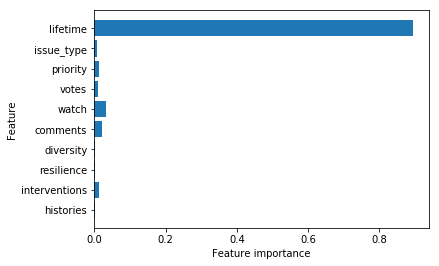

In [241]:
plot_feature_importances(RF)

# KNeighborsRegressor

In [125]:
from sklearn.neighbors import KNeighborsRegressor

In [288]:
X_train, X_test, Y_train, Y_test=tts(X,Y,random_state=0)

In [146]:
reg=KNeighborsRegressor(n_neighbors=5)

In [147]:
reg.fit(X_train,Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

### Scores

In [148]:
reg.score(X_train,Y_train)

0.84793718912931559

In [149]:
reg.score(X_test,Y_test)

0.75190741991644583

# Lasso Regression

In [253]:
from sklearn.linear_model import Lasso

In [264]:
lasso=Lasso(alpha=0.1)

In [265]:
lasso.fit(X_train,Y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

### Scores

In [266]:
lasso.score(X_train,Y_train)

0.79379648346830123

In [267]:
lasso.score(X_test,Y_test)

0.91298638789048736

# GradientBoostingRegressor

In [169]:
from sklearn.ensemble import GradientBoostingRegressor

In [314]:
GBR=GradientBoostingRegressor(alpha=0.001,n_estimators=200, random_state=34)

In [315]:
GBR.fit(X_train,Y_train)

GradientBoostingRegressor(alpha=0.001, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=34,
             subsample=1.0, verbose=0, warm_start=False)

### Scores

In [316]:
GBR.score(X_train,Y_train)

0.97502044821566325

In [317]:
GBR.score(X_test,Y_test)

0.85399289197615214

# Discussion

* Of the algorithms tried, the RandomForest produces a better score on the test data. It is not a very high score ~ 89%, which probably means that we need to introduce additional features. For example, how to include time evolution?


* On the other hand, the GradientBoostingRegressor has a very high training score ~ 97% but lower test score ~85%. I think the higher training score is due to higher complexity of the algorithm that can fit the training data very well. I was not able to find a different choice of parameters that increases the test score. 


* What do we do with the lifetime=0 data? I decided to treat this data as part of new data. Perhaps we should be more careful and try to find other features that can characterize this data.


* The RandomForest puts a lot of importance on lifetime. This is also the reason why the algorithm was performing badly on the test set with the lifetime=0 data. In fact, lifetime can explain around 90% of the data while the other features are sort of irrelevant.

# Conclusions




* RandomForest gives the best test_score. But this result needs improvement.


* Lifetime is the most important feature.


* Need more features. Perhaps more data?

# Brief Explanation of the Scripts

### Fake_GET script

In [ ]:
from flask import Flask, jsonify
from flask import abort
from flask import make_response

app = Flask(__name__)

# http://localhost:5000/api/...

@app.route('/api/issue/<name>/resolve-fake', methods=['GET'])

def get_task(name):
    if len(name) == 0:
        abort(404)
    task={'issue':name, 'predicted_resolution_date': '1984-01-01T00:00:00.000+0000'}
    return jsonify(task)


@app.errorhandler(404)
def not_found(error):
    return make_response(jsonify({'error': 'Not found'}), 404)

if __name__ == '__main__':
    app.run(debug=True)

### Prediction_GET


In [ ]:
import pickle    # <---- Load the regression model
import numpy as np
import pandas as pd

from dateutil.parser import parse
from datetime import timedelta

import json

app = Flask(__name__)


filename='AVRO-RForest-prediction.sav' #where the model was saved

loaded_model = pickle.load(open(filename, 'rb')) #loads the model

print("Loading data...")
# NOTE: data is in a folder named data and this folder is in the same folder of the script

data_issues_transitions=pd.read_csv('data/avro-transitions.csv')

data_issues_csv=pd.read_csv('data/avro-issues.csv')

data_issues=pd.read_json('data/avro-issues.json',lines=True)

print("Data is loaded.")

### Prepare data with function prepare_data(i)

In [ ]:
def prepare_data(i): #i: index of row in data_issues_csv
    #it puts out an array which we can use to predict a target
  
    
    key=data_issues_csv['key'][i]
    j=data_issues_transitions.index[data_issues_transitions['key']==key]
    j=list(j)
    
    l=len(j)
    k1=j[0]
    k2=j[l-1]
    t_data={'key': key,
        'type': data_issues_transitions['issue_type'][k1],
        'whenOpen': data_issues_transitions['created'][k1],
        'current':data_issues_transitions['when'][k2]}
    t1=parse(t_data['whenOpen'])
    t2=parse(t_data['current'])
    delta=t2-t1
    t_data['lifetime']=Delta_days(delta)
    
    issue_type=data_issues_transitions['issue_type'][k1]
    issue_dic=np.load('issue_type_dic.npy').item() #loads the dictionary
    issue_num=issue_dic[issue_type]

In [ ]:
@app.route('/api/issue/<name>/resolve-prediction', methods=['GET']) # # http://localhost:5000/api/...
# name: key of the issue

def get_task(name):
    if len(name) == 0:
        abort(404)
    i=get_index(name)
    
    if i=='none':
        abort(404)
    else:
        i=int(i)
        if data_issues_csv['status'][i]=='Resolved':
            date_resol=data_issues_csv['resolutiondate'][i]
            task={'issue':name, 'resolution_date': date_resol}
        else:
            x=prepare_data(i) #the input
            y_predict=loaded_model.predict(x)
            days_predict=y_predict[0] #just one point
            date_current_status=data_issues_csv['updated'][i]
            date_cur=parse(date_current_status)
            date_resol=date_cur+days_to_datetime(days_predict)
            date_string=date_resol.isoformat()
            task={'issue':name, 'predicted_resolution_date': date_string}
        
        
    return jsonify(task)


### Release_Plan script

In [ ]:
filename='AVRO-RForest-prediction.sav' #where the model was saved

loaded_model = pickle.load(open(filename, 'rb')) #loads the model

print("Loading data...")
# NOTE: data is in a folder named data and this folder is in the same folder of the script

data_issues_transitions=pd.read_csv('data/avro-transitions.csv')

data_issues_csv=pd.read_csv('data/avro-issues.csv')

data_issues=pd.read_json('data/avro-issues.json',lines=True)

print("Data is loaded.")


def Delta_days(x):
    seconds=x.seconds+x.microseconds/1000
    total=x.days+seconds/(24*3600)
    return total

def prepare_data(i): #i: index of row in data_issues_csv
    #it puts out an array which we can use to predict a target
  

In [ ]:
@app.route('/api/release/<date>/resolved-since-now', methods=['GET'])

#date not necessarily in ISOformat

def get_task(date):
    if len(date) == 0:
        abort(404)
    #define the data of json extraction. I will take the date of two weeks ago.
    
    date_extract= '2018-07-16T15:00:00.000+0000'
    
    lst=[]
    s=str()
    l=len(date)
    
    for u in range(0,l):     
        if date[u]!='-':
            s+=date[u]
            if u==l-1:
                lst.append(s)
        else:
            lst.append(s)
            s=str()

In [ ]:
resolved=[]
    for i in lst_non_resol:
        x=prepare_data(i) #the input
        y_predict=loaded_model.predict(x)
        days_predict=y_predict[0] #just one point
        date_current_status=data_issues_csv['updated'][i]
        date_cur=parse(date_current_status)
        date_resol=date_cur+days_to_datetime(days_predict)
        
        if len(date_list)==3: #there should be a match between years, month and days
            if date_resol.year==date_list[0] and date_resol.month==date_list[1] and date_resol.day==date_list[2]:
                key=data_issues_csv['key'][i]
                date_string=date_resol.isoformat()
                resolved.append({'key':key,'predicted_resolution_date':date_string})
        if len(date_list)==2: #only month and year are required to match
            if date_resol.year==date_list[0] and date_resol.month==date_list[1]:
                key=data_issues_csv['key'][i]
                date_string=date_resol.isoformat()
                resolved.append({'issue':key,'predicted_resolution_date':date_string})
    if len(resolved)==0:
        abort(404)
    else:
        task={'now':date_extract, 'issues': resolved}
        
        
    return jsonify(task)